# DSC 680 Project 3
## By: Jamie Tran 
## Date: 7/30/2024

### Libraries downloaded:

In [2]:
import pandas as pd
import numpy as np 
import warnings 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

### Exploratory data analysis:

In [3]:
#silence future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#import google dataset 
google = pd.read_csv('GOOG-2.csv')
#preview dataset
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-30,135.511002,135.771347,134.814194,135.220993,135.067291,23954000
1,2021-08-02,135.484497,136.020493,134.669495,135.989502,135.834930,20140000
2,2021-08-03,136.000000,136.335495,134.183502,136.279999,136.125092,19064000
3,2021-08-04,136.249496,136.537994,135.414993,136.028503,135.873886,16528000
4,2021-08-05,136.028503,136.949997,135.600006,136.940002,136.784348,11866000


In [5]:
#import apple dataset
apple = pd.read_csv('AAPL-2.csv')
#preview dataset
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-30,144.380005,146.330002,144.110001,145.860001,143.408936,70440600
1,2021-08-02,146.360001,146.949997,145.250000,145.520004,143.074615,62880000
2,2021-08-03,145.809998,148.039993,145.179993,147.360001,144.883698,64786600
3,2021-08-04,147.270004,147.789993,146.279999,146.949997,144.480576,56368300
4,2021-08-05,146.979996,147.839996,146.169998,147.059998,144.588760,46397700


In [6]:
#import tesla dataset
tesla = pd.read_csv('TSLA.csv')
#preview dataset
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-30,223.919998,232.509995,223.000000,229.066666,229.066666,88969200
1,2021-08-02,233.333328,242.313339,232.800003,236.556671,236.556671,100847400
2,2021-08-03,239.666672,240.883331,233.669998,236.580002,236.580002,64860900
3,2021-08-04,237.000000,241.633331,236.309998,236.973328,236.973328,51007800
4,2021-08-05,238.666672,240.316666,237.136673,238.210007,238.210007,38758800


In [7]:
#assiging columns to variables to build graphs 
goog_close = [google['Close']]
appl_close = [apple['Close']]
tsla_close = [tesla['Close']]
goog_vol = [google['Volume']]
appl_vol = [apple['Volume']]
tsla_vol = [tesla['Volume']]
date = [google['Date']]

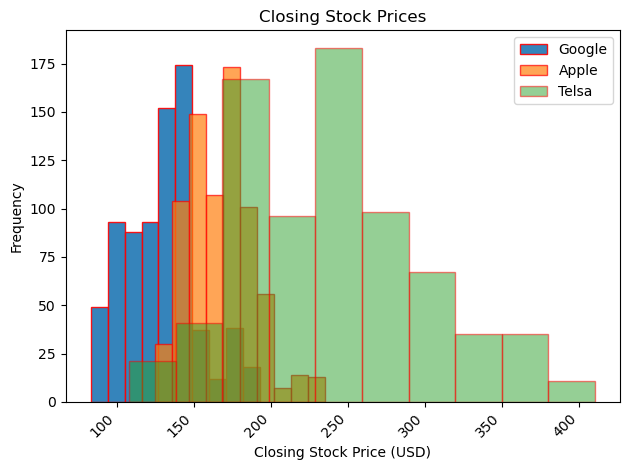

In [8]:
#plotting closing prices of all three stocks 
plt.hist(goog_close, alpha=.9, edgecolor='red')
plt.hist(appl_close, alpha=.7, edgecolor='red')
plt.hist(tsla_close, alpha=.5, edgecolor='red')
plt.title('Closing Stock Prices')
plt.xlabel('Closing Stock Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Google', 'Apple', 'Telsa'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

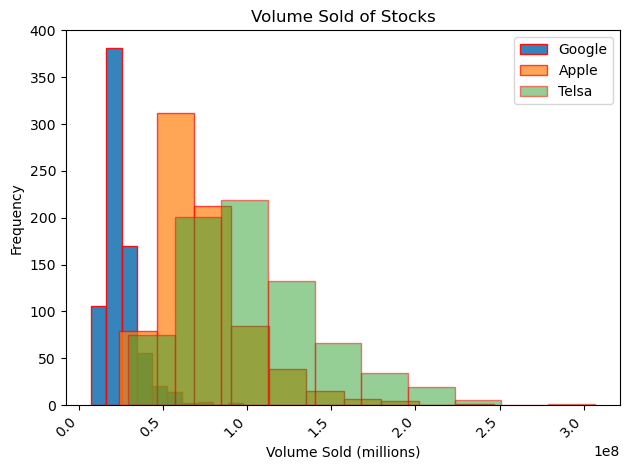

In [9]:
#plotting volume of all three stocks 
plt.hist(goog_vol, alpha=.9, edgecolor='red')
plt.hist(appl_vol, alpha=.7, edgecolor='red')
plt.hist(tsla_vol, alpha=.5, edgecolor='red')
plt.title('Volume Sold of Stocks')
plt.xlabel('Volume Sold (millions)')
plt.ylabel('Frequency')
plt.legend(['Google', 'Apple', 'Telsa'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
#checking for missing values 
google.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#checking for missing values 
apple.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
#checking for missing values
tesla.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Project Code:

#### Google code:

In [13]:
#split data with and without closing price column 
x = google.drop(['Close', 'Date'], axis = 1)
y = google['Close']

In [14]:
#splitting data into a training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#fitting and scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
#creating ridge model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train_scaled, y_train)

Ridge()

In [17]:
#creating predictions for y datasets
y_pred_train = ridge_reg.predict(x_train_scaled)
y_pred_test = ridge_reg.predict(x_test_scaled)

In [18]:
#generating evaluation metrics for google
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [19]:
#printing evaluatiion metrics for google
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Train MSE: 0.13219271418804293
Test MSE: 0.11821187656023735
Train R2: 0.999749558897582
Test R2: 0.9998119864751344


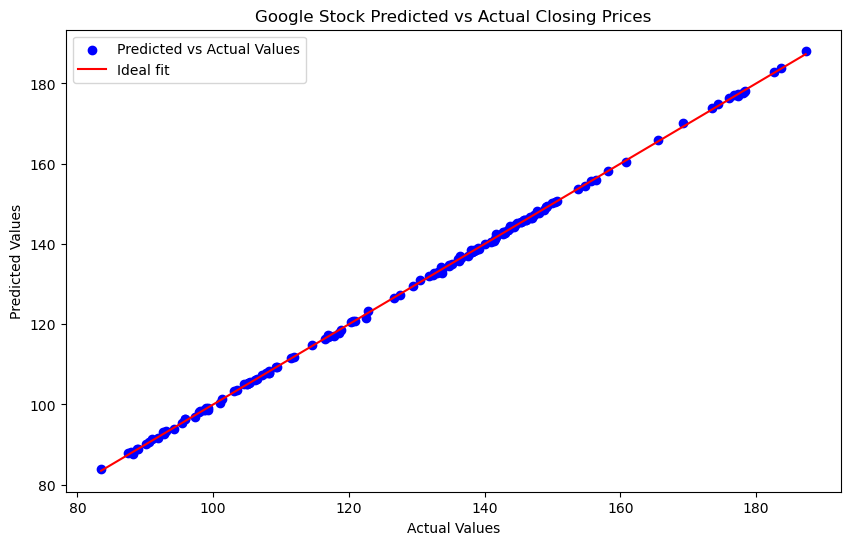

In [21]:
#plotting linear regression graph 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted vs Actual Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Google Stock Predicted vs Actual Closing Prices')
plt.legend()
plt.show()

#### Apple code:

In [22]:
#split data with and without closing price column 
x_app = apple.drop(['Close', 'Date'], axis = 1)
y_app = apple['Close']

In [23]:
#splitting data into a training and test set
x_app_train, x_app_test, y_app_train, y_app_test = train_test_split(x_app, y_app, test_size=0.2, random_state=42)

In [24]:
#fitting and scaling data
scaler = StandardScaler()
x_app_train_scaled = scaler.fit_transform(x_app_train)
x_app_test_scaled = scaler.transform(x_app_test)

In [25]:
#creating ridge model
app_ridge_reg = Ridge(alpha=1.0)
app_ridge_reg.fit(x_app_train_scaled, y_app_train)

Ridge()

In [26]:
#creating predictions for y datasets
y_app_pred_train = app_ridge_reg.predict(x_app_train_scaled)
y_app_pred_test = app_ridge_reg.predict(x_app_test_scaled)

In [27]:
#generating evaluation metrics for apple
app_train_mse = mean_squared_error(y_app_train, y_app_pred_train)
app_test_mse = mean_squared_error(y_app_test, y_app_pred_test)
app_train_r2 = r2_score(y_app_train, y_app_pred_train)
app_test_r2 = r2_score(y_app_test, y_app_pred_test)

In [28]:
#printing evaluatiion metrics for apple
print(f"Train MSE: {app_train_mse}")
print(f"Test MSE: {app_test_mse}")
print(f"Train R2: {app_train_r2}")
print(f"Test R2: {app_test_r2}")

Train MSE: 0.30592158373200123
Test MSE: 0.2876290728197931
Train R2: 0.9992631307875748
Test R2: 0.9993814949194418


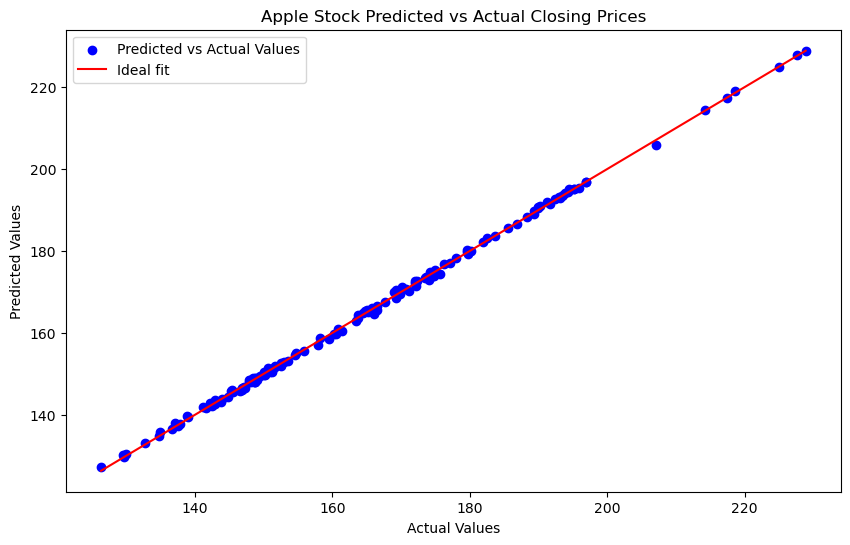

In [29]:
#plotting linear regression graph 
plt.figure(figsize=(10, 6))
plt.scatter(y_app_test, y_app_pred_test, color='blue', label='Predicted vs Actual Values')
plt.plot([min(y_app_test), max(y_app_test)], [min(y_app_test), max(y_app_test)], color='red', label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Apple Stock Predicted vs Actual Closing Prices')
plt.legend()
plt.show()

#### Tesla code:

In [30]:
#split data with and without closing price column 
x_tsla = tesla.drop(['Close', 'Date'], axis = 1)
y_tsla = tesla['Close']

In [31]:
#splitting data into a training and test set
x_tsla_train, x_tsla_test, y_tsla_train, y_tsla_test = train_test_split(x_tsla, y_tsla, test_size=0.2, random_state=42)

In [32]:
#fitting and scaling data
scaler = StandardScaler()
x_tsla_train_scaled = scaler.fit_transform(x_tsla_train)
x_tsla_test_scaled = scaler.transform(x_tsla_test)

In [33]:
#creating ridge model
tsla_ridge_reg = Ridge(alpha=1.0)
tsla_ridge_reg.fit(x_tsla_train_scaled, y_tsla_train)

Ridge()

In [34]:
#creating predictions for y datasets
y_tsla_pred_train = tsla_ridge_reg.predict(x_tsla_train_scaled)
y_tsla_pred_test = tsla_ridge_reg.predict(x_tsla_test_scaled)

In [35]:
#generating evaluation metrics for tesla
tsla_train_mse = mean_squared_error(y_tsla_train, y_tsla_pred_train)
tsla_test_mse = mean_squared_error(y_tsla_test, y_tsla_pred_test)
tsla_train_r2 = r2_score(y_tsla_train, y_tsla_pred_train)
tsla_test_r2 = r2_score(y_tsla_test, y_tsla_pred_test)

In [36]:
#printing evaluatiion metrics for tesla
print(f"Train MSE: {tsla_train_mse}")
print(f"Test MSE: {tsla_test_mse}")
print(f"Train R2: {tsla_train_r2}")
print(f"Test R2: {tsla_test_r2}")

Train MSE: 0.6615217022958457
Test MSE: 0.6316699768054169
Train R2: 0.9997985843651748
Test R2: 0.9998599753182539


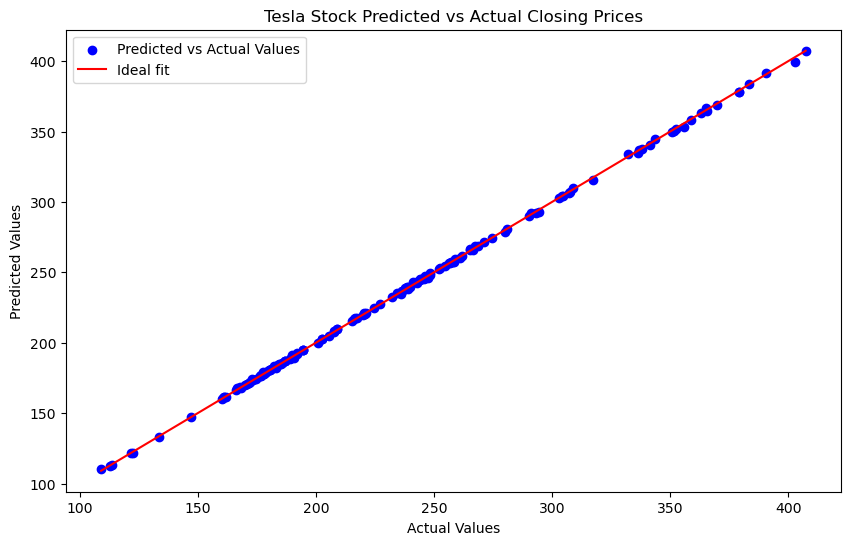

In [38]:
#plotting linear regression graph 
plt.figure(figsize=(10, 6))
plt.scatter(y_tsla_test, y_tsla_pred_test, color='blue', label='Predicted vs Actual Values')
plt.plot([min(y_tsla_test), max(y_tsla_test)], [min(y_tsla_test), max(y_tsla_test)], color='red', label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Tesla Stock Predicted vs Actual Closing Prices')
plt.legend()
plt.show()